"""
Computer Vision & Deep Learning on Medical Images
Lecture-02 Home Task 1
---------------------------------------------------
Enhancement Methods:
  1. Gamma Correction
  2. CLAHE (Contrast Limited Adaptive Histogram Equalization)

Augmentation Methods:
  1. Rotation
  2. Zoom
  3. Flipping

Author: Md. Bilayet Hossain

University: Daffodil International University (DIU)
---------------------------------------------------
"""

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os

In [3]:
# ---------- Load medical image ----------
img_path = "/Brain Tumor.png"   # Replace with your image filename if needed
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

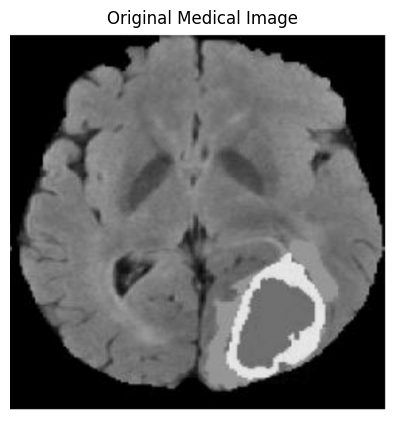

In [4]:
plt.figure(figsize=(5,5))
plt.title("Original Medical Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# =====================================================
# =============== IMAGE ENHANCEMENT ===================
# =====================================================

In [5]:
# 1️⃣ Gamma Correction
gamma = 1.5  # Adjust gamma value ( <1 darker, >1 lighter )
gamma_corrected = np.array(255*(img / 255) ** (1 / gamma), dtype='uint8')

In [6]:
# 2️⃣ CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

In [7]:
# ---------- Display Enhancement Results ----------
titles = ["Original", "Gamma Correction", "CLAHE"]
images = [img, gamma_corrected, clahe_img]

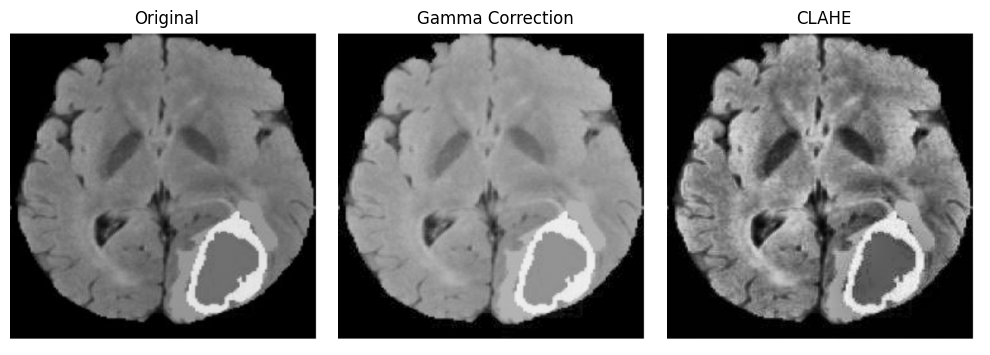

In [8]:
plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# =====================================================
# =============== IMAGE AUGMENTATION ==================
# =====================================================

In [9]:
# 1️⃣ Rotation (Rotate 30 degrees)
rotated = ndimage.rotate(img, 30, reshape=False)

In [25]:
# 2️⃣ Zooming (1.0 x zoom)
zoom_factor = 1.1
h, w = img.shape
zoomed = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)
zoomed = zoomed[0:h, 0:w]

In [26]:
# 3️⃣ Flipping (Horizontal)
flip_h = cv2.flip(img, 1)

In [29]:
# ---------- Display Augmentation Results ----------
titles2 = ["Original", "Rotated 90°", "Zoomed 1.1x", "Flipped Horizontal"]
images2 = [img, rotated, zoomed, flip_h]

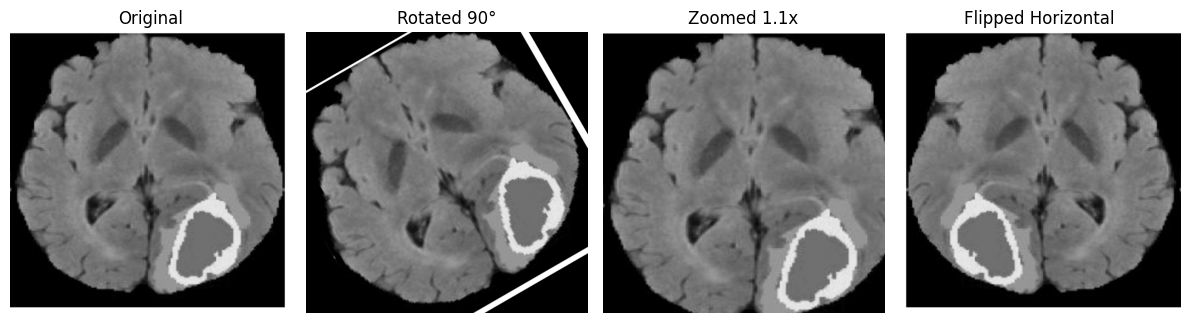

In [30]:
plt.figure(figsize=(12,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images2[i], cmap='gray')
    plt.title(titles2[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# =====================================================
# =============== SAVE OUTPUTS ========================
# =====================================================

In [32]:
out_dir = r"E:\Bootcamp on Cumputer Vision\Medical_images\enhancement_augmentation_outputs"
os.makedirs(out_dir, exist_ok=True)

cv2.imwrite(os.path.join(out_dir, "enh_gamma.png"), gamma_corrected)
cv2.imwrite(os.path.join(out_dir, "enh_clahe.png"), clahe_img)
cv2.imwrite(os.path.join(out_dir, "aug_rotate.png"), rotated)
cv2.imwrite(os.path.join(out_dir, "aug_zoom.png"), zoomed)
cv2.imwrite(os.path.join(out_dir, "aug_flip_h.png"), flip_h)

print("✅ All enhanced and augmented images saved to:", out_dir)


✅ All enhanced and augmented images saved to: E:\Bootcamp on Cumputer Vision\Medical_images\enhancement_augmentation_outputs
